In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

df= pd.read_excel('output_params_Phase.xlsx')

# # FCC=0, FCC+BCC=1, BCC=2

data= df.drop('Phase',axis='columns')
target= df['Phase']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data = data_scaled, columns =['Ni', 'Al', 'Co', 'Fe', 'Cr', 'Δsₘᵢₓ', 'VEC', 'δ', 'Δχ', 'ΔHₘᵢₓ', 'Ω','Tm'])


from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(data,target,test_size=0.2,random_state=42)

In [3]:
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(0)

In [5]:
xtrain= xtrain.to_numpy()
xtest = xtest.to_numpy()
ytrain= ytrain.to_numpy()
ytest = ytest.to_numpy()

In [6]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [7]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    clf = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            clf.add(Dense(first_layer_nodes,input_dim=12, activation=activation_func))
        else:
            clf.add(Dense(n_nodes[i-1], activation=activation_func))
            
    #Final layer
    clf.add(Dense(3, activation='softmax'))
    clf.compile(optimizer='adam', loss=loss_func, metrics = ["accuracy"])
    
    return clf

#Wrap model/classifier into scikit-learn
clf =  KerasClassifier(build_fn=createmodel, verbose = True)

In [8]:
# ## OPTIMIZED PARAMETERS WERE FOUND BY THIS

# activation_funcs = ['tanh','relu','sigmoid'] 
# loss_funcs = ['categorical_crossentropy']
# param_grid = dict(n_layers=[5,6], first_layer_nodes = [32,16], last_layer_nodes = [4],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [1000], epochs = [100])
# grid = GridSearchCV(estimator = clf, param_grid = param_grid)

#  BEST PARAMS:
# {'activation_func': 'tanh',
#  'batch_size': 1000,
#  'epochs': 100,
#  'first_layer_nodes': 32,
#  'last_layer_nodes': 4,
#  'loss_func': 'categorical_crossentropy',
#  'n_layers': 6}

In [9]:
activation_funcs = ['tanh'] 
loss_funcs = ['categorical_crossentropy']
param_grid = dict(n_layers=[6], first_layer_nodes = [32], last_layer_nodes = [4],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [1000], epochs = [100])
grid = GridSearchCV(estimator = clf, param_grid = param_grid)

In [10]:
grid.fit(xtrain,ytrain)

Epoch 1/100
9/9 [==============================] - 5s 6ms/step - loss: 1.0002 - accuracy: 0.4652
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8464 - accuracy: 0.6604
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7088 - accuracy: 0.7958
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5812 - accuracy: 0.8408
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4885 - accuracy: 0.8755
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.9027
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3657 - accuracy: 0.9215
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.9413
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2916 - accuracy: 0.9491
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2658 - accuracy: 0.9526
Epoch 11/100
9/9 [===========

9/9 [==============================] - 0s 12ms/step - loss: 0.0665 - accuracy: 0.9796
Epoch 85/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0664 - accuracy: 0.9792
Epoch 86/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0647 - accuracy: 0.9803
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.9795
Epoch 88/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0658 - accuracy: 0.9786
Epoch 89/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0634 - accuracy: 0.9798
Epoch 90/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0627 - accuracy: 0.9818
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0666 - accuracy: 0.9785
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0660 - accuracy: 0.9788
Epoch 93/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0621 - accuracy: 0.9818
Epoch 94/100
9/9 [==============

9/9 [==============================] - 0s 8ms/step - loss: 0.0657 - accuracy: 0.9792
Epoch 67/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0636 - accuracy: 0.9803
Epoch 68/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0620 - accuracy: 0.9814
Epoch 69/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0615 - accuracy: 0.9825
Epoch 70/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0624 - accuracy: 0.9806
Epoch 71/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0629 - accuracy: 0.9801
Epoch 72/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0604 - accuracy: 0.9818
Epoch 73/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0632 - accuracy: 0.9809
Epoch 74/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0650 - accuracy: 0.9775
Epoch 75/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0604 - accuracy: 0.9814
Epoch 76/100
9/9 [===============

9/9 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.9754
Epoch 49/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0799 - accuracy: 0.9765
Epoch 50/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0785 - accuracy: 0.9773
Epoch 51/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0794 - accuracy: 0.9773
Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0794 - accuracy: 0.9762
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0777 - accuracy: 0.9766
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0743 - accuracy: 0.9781
Epoch 55/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0734 - accuracy: 0.9784
Epoch 56/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0724 - accuracy: 0.9791
Epoch 57/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0719 - accuracy: 0.9793
Epoch 58/100
9/9 [===============

9/9 [==============================] - 0s 17ms/step - loss: 0.1062 - accuracy: 0.9647
Epoch 31/100
9/9 [==============================] - 0s 18ms/step - loss: 0.1045 - accuracy: 0.9653
Epoch 32/100
9/9 [==============================] - 0s 18ms/step - loss: 0.1021 - accuracy: 0.9680
Epoch 33/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0996 - accuracy: 0.9670
Epoch 34/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0972 - accuracy: 0.9693
Epoch 35/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0945 - accuracy: 0.9711
Epoch 36/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0935 - accuracy: 0.9713
Epoch 37/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0928 - accuracy: 0.9715
Epoch 38/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0906 - accuracy: 0.9730
Epoch 39/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0896 - accuracy: 0.9715
Epoch 40/100
9/9 [=====

9/9 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.9343
Epoch 13/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2292 - accuracy: 0.9397
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2132 - accuracy: 0.9488
Epoch 15/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1999 - accuracy: 0.9510
Epoch 16/100
9/9 [==============================] - ETA: 0s - loss: 0.1834 - accuracy: 0.96 - 0s 5ms/step - loss: 0.1879 - accuracy: 0.9542
Epoch 17/100
9/9 [==============================] - ETA: 0s - loss: 0.1808 - accuracy: 0.95 - 0s 5ms/step - loss: 0.1777 - accuracy: 0.9577
Epoch 18/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1697 - accuracy: 0.9587
Epoch 19/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1625 - accuracy: 0.9593
Epoch 20/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1567 - accuracy: 0.9586
Epoch 21/100
9/9 [=============================

9/9 [==============================] - 0s 5ms/step - loss: 0.0634 - accuracy: 0.9801
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0614 - accuracy: 0.9818
Epoch 96/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0613 - accuracy: 0.9817
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0610 - accuracy: 0.9804
Epoch 98/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9820
Epoch 99/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0591 - accuracy: 0.9831
Epoch 100/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0519 - accuracy: 0.9814
Epoch 1/100
11/11 [==============================] - 1s 4ms/step - loss: 1.0826 - accuracy: 0.4281
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.8998 - accuracy: 0.6146
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7576 - accuracy: 0.7364
Epoch 4/100
11/11 [==========

11/11 [==============================] - 0s 10ms/step - loss: 0.0630 - accuracy: 0.9803
Epoch 68/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0631 - accuracy: 0.9793
Epoch 69/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0616 - accuracy: 0.9791
Epoch 70/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0609 - accuracy: 0.9810
Epoch 71/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0596 - accuracy: 0.9807
Epoch 72/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0611 - accuracy: 0.9799
Epoch 73/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0595 - accuracy: 0.9815
Epoch 74/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0599 - accuracy: 0.9815
Epoch 75/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0603 - accuracy: 0.9820
Epoch 76/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0584 - accuracy: 0.9817
Epoc

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000232F351B160>,
             param_grid={'activation_func': ['tanh'], 'batch_size': [1000],
                         'epochs': [100], 'first_layer_nodes': [32],
                         'last_layer_nodes': [4],
                         'loss_func': ['categorical_crossentropy'],
                         'n_layers': [6]})

In [11]:
grid.best_score_

0.982490062713623

In [12]:
grid.score(xtest, ytest)

3/3 [==============================] - 1s 5ms/step - loss: 0.0436 - accuracy: 0.9859


0.98591548204422

In [13]:
grid.score(xtrain, ytrain)

11/11 [==============================] - 0s 10ms/step - loss: 0.0523 - accuracy: 0.9841


0.9840555787086487

In [14]:
ypred= grid.predict(xtest)

c:\users\anubh\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3/3 [==============================] - 0s 3ms/step


In [15]:
ypred

array([0, 2, 0, ..., 2, 2, 1], dtype=int64)

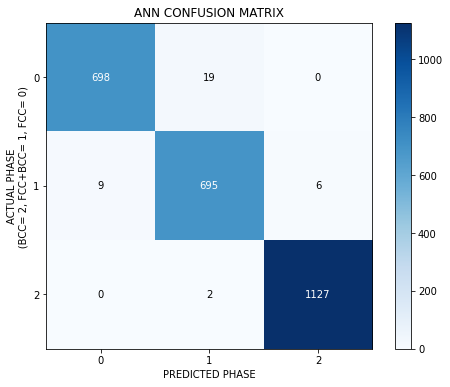

In [18]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(ytest, ypred,title='ANN CONFUSION MATRIX', normalize=False, figsize=(8,6))
plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
              (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')
plt.savefig('ANN_cm.jpg')

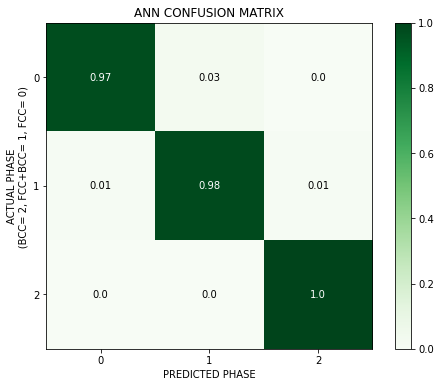

In [19]:
skplt.metrics.plot_confusion_matrix(ytest, ypred,title='ANN CONFUSION MATRIX', normalize=True, figsize=(8,6),cmap='Greens')
plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
              (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')
plt.savefig('normalized_cm_ann.jpg')

In [20]:
from sklearn.inspection import permutation_importance


pi= permutation_importance(grid, xtrain, ytrain,random_state=42)
result=pi.importances_mean

fi = pd.DataFrame(result, index= data.columns, columns= ['importance']).sort_values('importance', ascending=False)

print(fi)

11/11 [==============================] - 0s 6ms/step - loss: 0.4005 - accuracy: 0.9019
       importance
Al       0.180417
δ        0.135635
Cr       0.105820
Ni       0.103727
VEC      0.101027
Tm       0.083772
Fe       0.080876
ΔHₘᵢₓ    0.052548
Δsₘᵢₓ    0.021540
Δχ       0.020561
Ω        0.012775
Co       0.009273


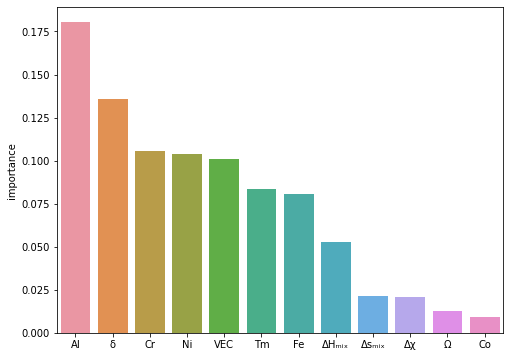

In [22]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x=fi.index,y='importance',data=fi)
plt.savefig('FI_ANN.jpg')